In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [36]:
df = pd.read_csv("C:\\Users\\Asad Computrs\\Downloads\\customer.csv")
df.head()

,Customer ID,Age,City,Income,Education Level,Last Purchase Date,Monthly Spending,Preferred Product Category
0,1,32.0,New York,60000.0,Bachelor's,10/25/2023,250,Electronics
1,2,28.0,Los Angeles,45000.0,Associate's,11/12/2023,180,Clothing
2,3,40.0,Chicago,52000.0,High School,10/7/2023,300,Groceries
3,4,NaN,San Francisco,NaN,NaN,11/5/2023,150,Home Improvement
4,5,25.0,Atlanta,38000.0,Diploma,10/15/2023,120,Beauty


In [15]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Preferred Product Category'].fillna(df['Preferred Product Category'].mode()[0], inplace=True)
print(df)

   Customer ID   Age           City        Income Education Level  \
0            1  32.0       New York  60000.000000      Bachelor's   
1            2  28.0    Los Angeles  45000.000000     Associate's   
2            3  40.0        Chicago  52000.000000     High School   
3            4  32.0  San Francisco  51714.285714     Associate's   
4            5  25.0        Atlanta  38000.000000         Diploma   
5            6  36.0        Seattle  70000.000000        Master's   
6            7  22.0        Houston  51714.285714         Diploma   
7            8  48.0          Miami  55000.000000      Bachelor's   
8            9  30.0         Denver  51714.285714     Associate's   
9           10  27.0   Philadelphia  42000.000000     High School   

  Last Purchase Date  Monthly Spending Preferred Product Category  
0         10/25/2023               250                Electronics  
1         11/12/2023               180                   Clothing  
2          10/7/2023               3

In [24]:
missing_values = df.isnull().sum()
print("missing values of distribution:")
print(missing_values)

missing values of distribution:
Customer ID                   0
Age                           0
City                          0
Income                        0
Education Level               0
Last Purchase Date            0
Monthly Spending              0
Preferred Product Category    0
dtype: int64


In [33]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Income'].fillna(df['Income'].median(), inplace=True)

df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Preferred Product Category'].fillna(df['Preferred Product Category'].mode()[0], inplace=True)

print("\nUpdated Dataset:")
print(df)


Updated Dataset:
   Customer ID   Age           City        Income Education Level  \
0            1  32.0       New York  60000.000000      Bachelor's   
1            2  28.0    Los Angeles  45000.000000     Associate's   
2            3  40.0        Chicago  52000.000000     High School   
3            4  32.0  San Francisco  51714.285714     Associate's   
4            5  25.0        Atlanta  38000.000000         Diploma   
5            6  36.0        Seattle  70000.000000        Master's   
6            7  22.0        Houston  51714.285714         Diploma   
7            8  48.0          Miami  55000.000000      Bachelor's   
8            9  30.0         Denver  51714.285714     Associate's   
9           10  27.0   Philadelphia  42000.000000     High School   

  Last Purchase Date  Monthly Spending Preferred Product Category  
0         10/25/2023               250                Electronics  
1         11/12/2023               180                   Clothing  
2          10/7/20

In [25]:
numerical_stats = df[['Age', 'Income', 'Monthly Spending']].describe()
print("Statistics:")
print(numerical_stats)

Statistics:
            Age        Income  Monthly Spending
count  10.00000     10.000000         10.000000
mean   32.00000  51714.285714        196.000000
std     7.67391   9076.395341         98.905117
min    22.00000  38000.000000         80.000000
25%    27.25000  46678.571429        127.500000
50%    31.00000  51714.285714        170.000000
75%    35.00000  54250.000000        242.500000
max    48.00000  70000.000000        400.000000


In [19]:
numerical_features = df[['Age', 'Income', 'Monthly Spending']]
numerical_features.fillna(numerical_features.median(), inplace=True)

C:\Users\Asad Computrs\AppData\Local\Temp\ipykernel_3968\1694208085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features.fillna(numerical_features.median(), inplace=True)


In [26]:
scale = StandardScaler()
numerical_features_standardized = scale.fit_transform(numerical_features)

In [27]:
pca_1 = PCA(n_components=2)
principal_components = pca_1.fit_transform(numerical_features_standardized)

In [28]:
df_red = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_red['Preferred Product Category'] = df['Preferred Product Category']

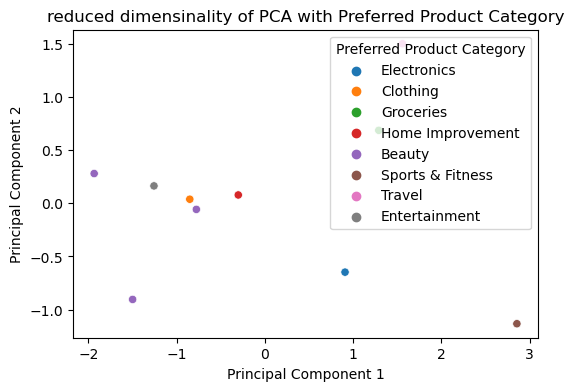

In [34]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Preferred Product Category', data=reduced_df)
plt.title('reduced dimensinality of PCA with Preferred Product Category')
plt.show()